<a href="https://colab.research.google.com/github/chirag-trivedi/data-science/blob/main/Honey_Production_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement - Honey Production Case Study
Background: In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component of American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insights into honey production supply and demand in America from 1998 to 2016.

Objective: To visualize how honey production has changed over the years (1998-2016) in the United States.

Key questions to be answered:

How has honey production yield changed from 1998 to 2016?
Over time, what are the major production trends across the states?
Are there any patterns that can be observed between total honey production and the value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?
Dataset:

state: Various states of the U.S.
year: Year of production
stocks: Refers to stocks held by producers. Unit is pounds
numcol: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year
yieldpercol: Honey yield per colony. Unit is pounds
totalprod: Total production (numcol x yieldpercol). Unit is pounds
priceperlb: Refers to the average price per pound based on expanded sales. The unit is dollars.
prodvalue: Value of production (totalprod x priceperlb). The unit is dollars.
Other useful information: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, the summation of states will not equal the U.S. level value of production.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('honeyproduction.csv')

In [3]:
df.head()


,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


Load the data and check some rows

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        785 non-null    object 
 1   numcol       785 non-null    float64
 2   yieldpercol  785 non-null    int64  
 3   totalprod    785 non-null    float64
 4   stocks       785 non-null    float64
 5   priceperlb   785 non-null    float64
 6   prodvalue    785 non-null    float64
 7   year         785 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 49.2+ KB


There are float , int and object data types

In [5]:
df.shape

(785, 8)

There are 785 rows and 8 cols

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
numcol,785.0,6.168662e+04,9.274894e+04,2000.00,9000.00,26000.00,65000.00,510000.00
yieldpercol,785.0,6.057834e+01,1.942783e+01,19.00,46.00,58.00,72.00,136.00
totalprod,785.0,4.140957e+06,6.884594e+06,84000.00,470000.00,1500000.00,4096000.00,46410000.00
stocks,785.0,1.257629e+06,2.211794e+06,8000.00,119000.00,391000.00,1380000.00,13800000.00
priceperlb,785.0,1.695159e+00,9.306234e-01,0.49,1.05,1.48,2.04,7.09
prodvalue,785.0,5.489739e+06,9.425394e+06,162000.00,901000.00,2112000.00,5559000.00,83859000.00
year,785.0,2.006818e+03,5.491523e+00,1998.00,2002.00,2007.00,2012.00,2016.00


No of colonies range from 2000 to 51000 .The avg is closer to the 75 percentile indicating right skewness
Yield per colony has a huge spread from 19 to 136 and the mean and median are close indicating even distribution



Spread of Honey Producing Colonies

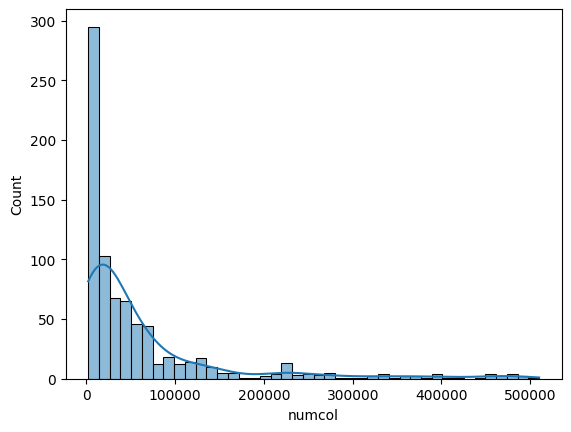

In [7]:
sns.histplot(df['numcol'],kde=True);

Indicates right skewness

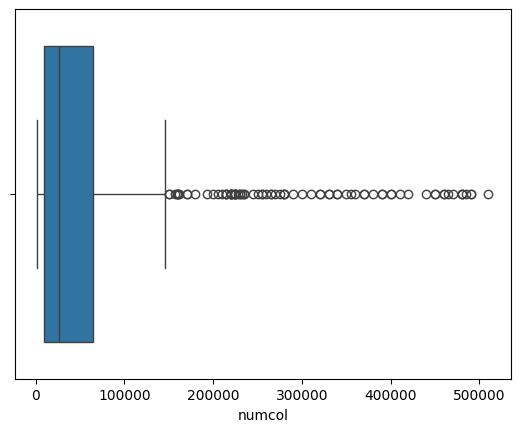

In [8]:
sns.boxplot(data=df , x=df['numcol']);

Lot of outliers seen

Yield Per Colony

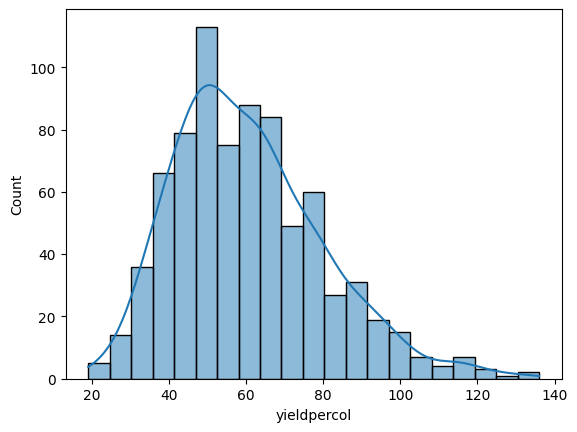

In [9]:
sns.histplot(df['yieldpercol'],kde=True);

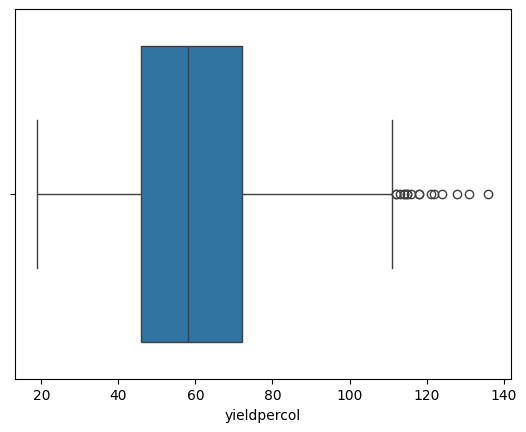

In [10]:
sns.boxplot(data=df , x=df['yieldpercol']);

Data is evenly distributed
Median is close to 60 pounds

Total Prod

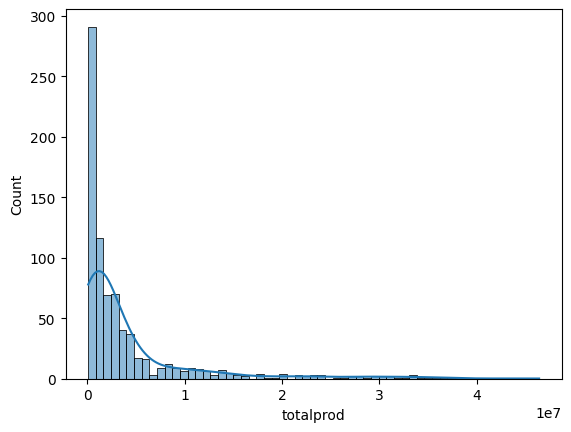

In [11]:
sns.histplot(df['totalprod'],kde=True);

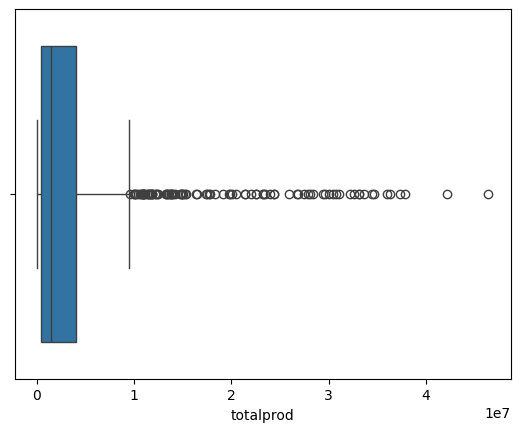

In [12]:
sns.boxplot(data=df , x=df['totalprod']);

Right skewed data

Stocks

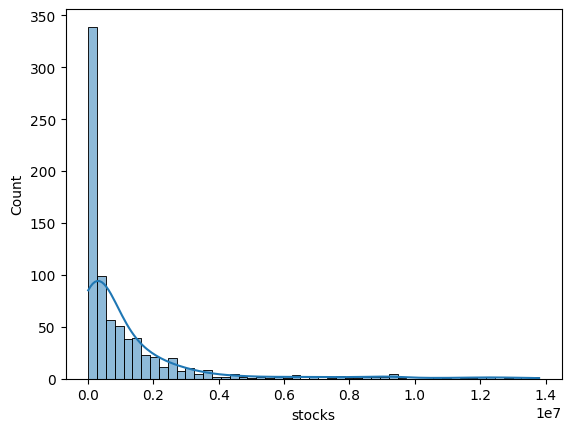

In [13]:
sns.histplot(df['stocks'],kde=True);

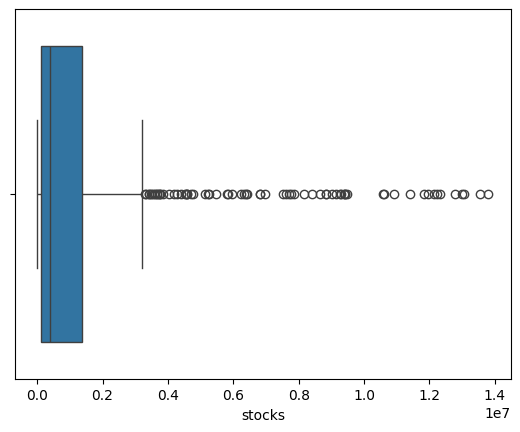

In [14]:
sns.boxplot(data=df , x=df['stocks']);

Right skewed data with lots of outliers

priceperlb

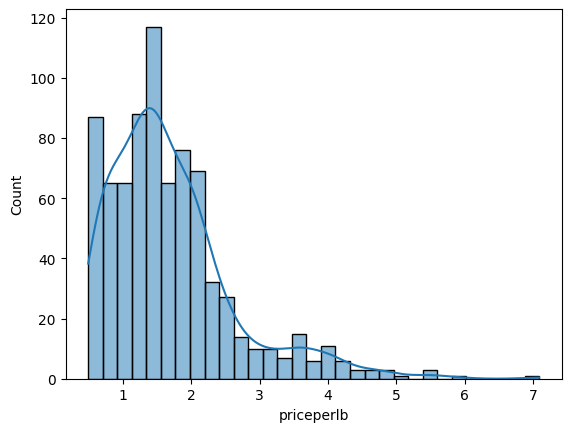

In [15]:
sns.histplot(df['priceperlb'],kde=True);

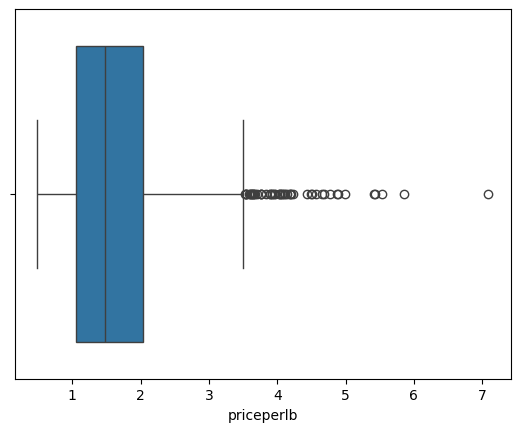

In [16]:
sns.boxplot(data=df , x=df['priceperlb']);

Most of the honey is priced from 0 to 2 dollars
Right skewed data
Median is 1.48 dollars

Prod Value

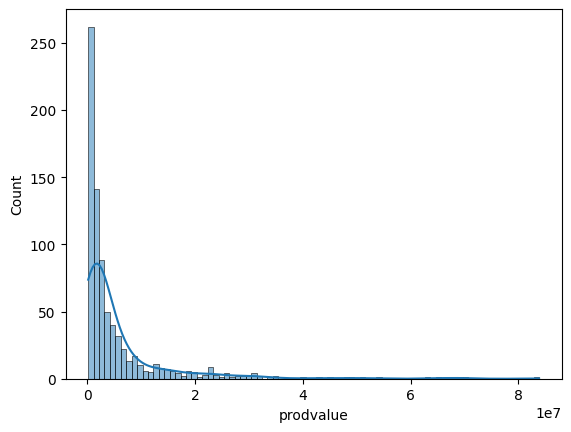

In [17]:
sns.histplot(df['prodvalue'],kde=True);

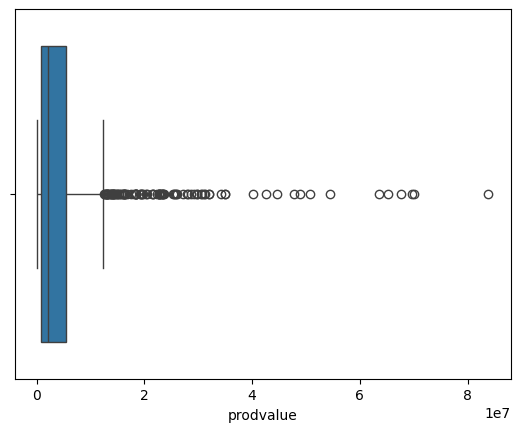

In [18]:
sns.boxplot(data=df , x=df['prodvalue']);

Right skewed


Trends over Time

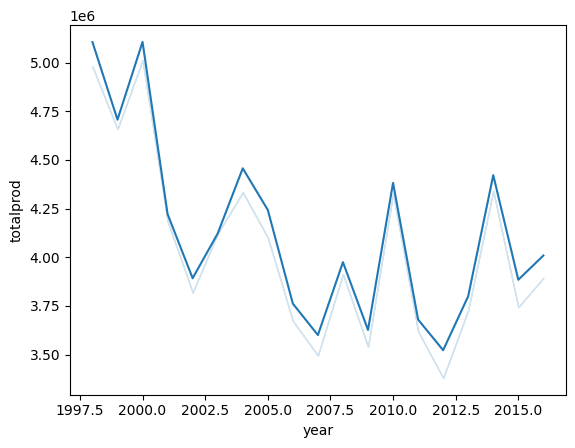

In [19]:
sns.lineplot(data=df , x='year' , y='totalprod',errorbar=('ci', False));
plt.show()

Relationship between Variables

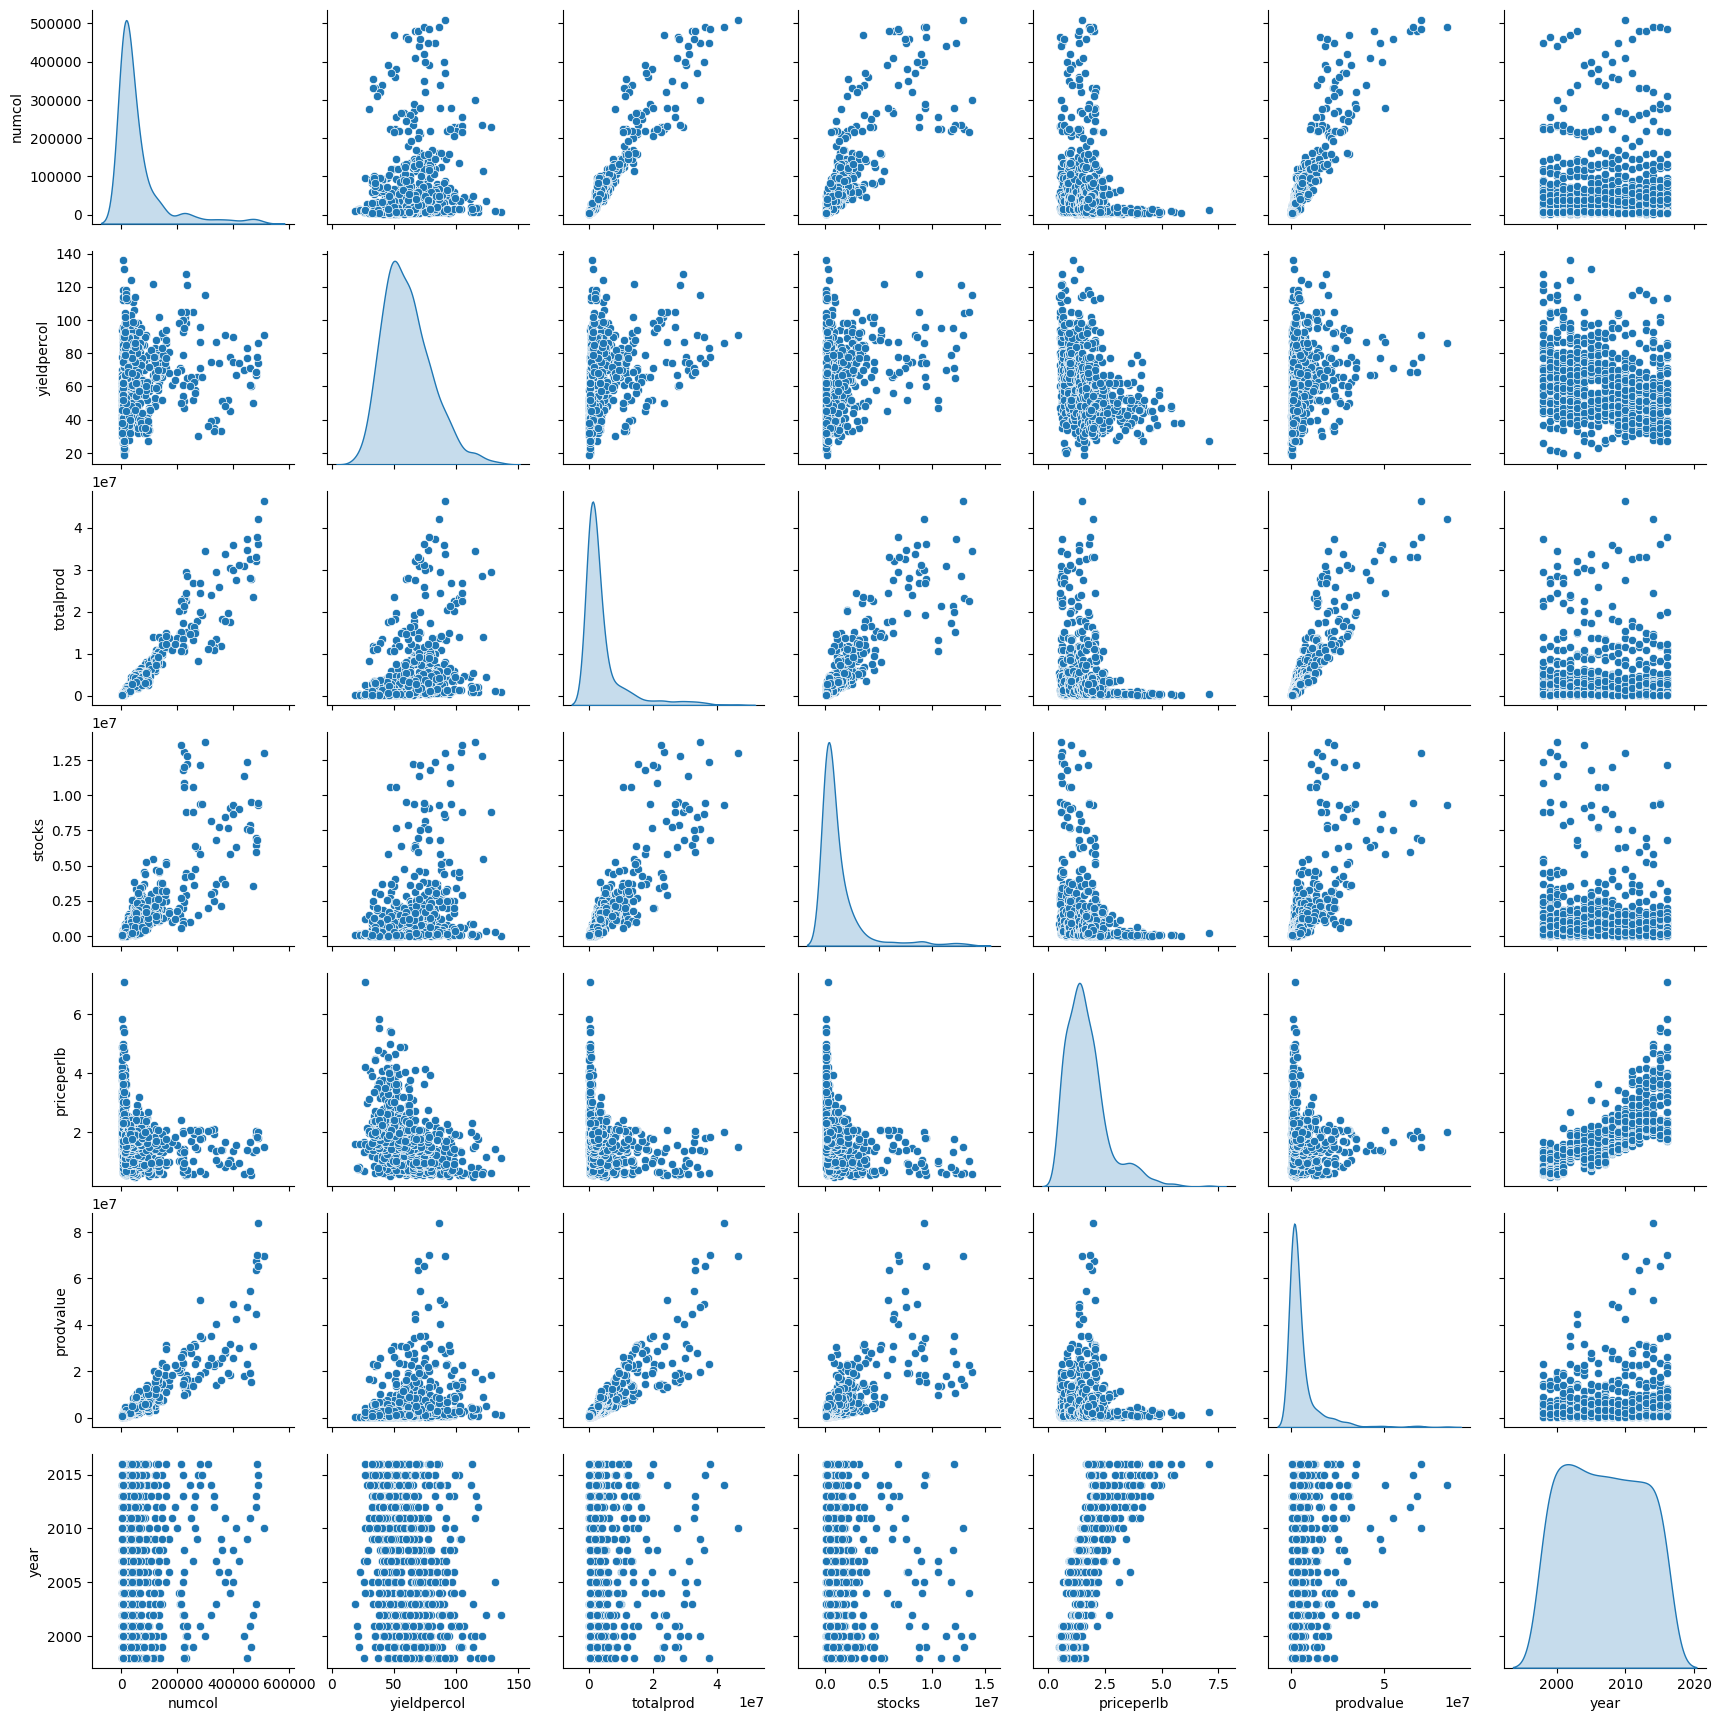

In [20]:
sns.pairplot(df, diag_kind="kde");

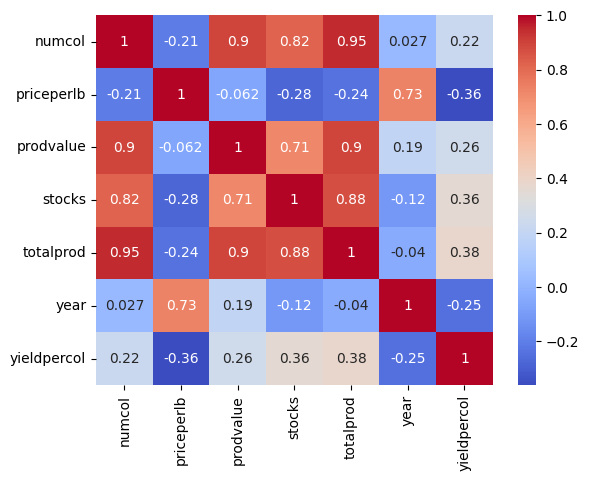

In [21]:
sns.heatmap(df[df.columns.difference(['state'])].corr(),annot=True, cmap='coolwarm');

numcol and totalprod , stocks and totalprod , stocks and prod value are all highly +vely correlated
price4perlb and yieldpercol do not have correlation with other variables

Let's try to visualise trends in columns state and year

In [22]:
df['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'South Carolina'], dtype=object)

In [23]:
df['state'].nunique()

44

There are 44 states that produce honey

In [24]:
df_top10 = df.groupby('state')['totalprod'].sum().sort_values(ascending=False).reset_index().head(10)
df_top10

,state,totalprod
0,North Dakota,624435000.0
1,California,390315000.0
2,South Dakota,344361000.0
3,Florida,297798000.0
4,Montana,210125000.0
5,Minnesota,175432000.0
6,Texas,137832000.0
7,Wisconsin,95067000.0
8,Michigan,93788000.0
9,Idaho,78362000.0


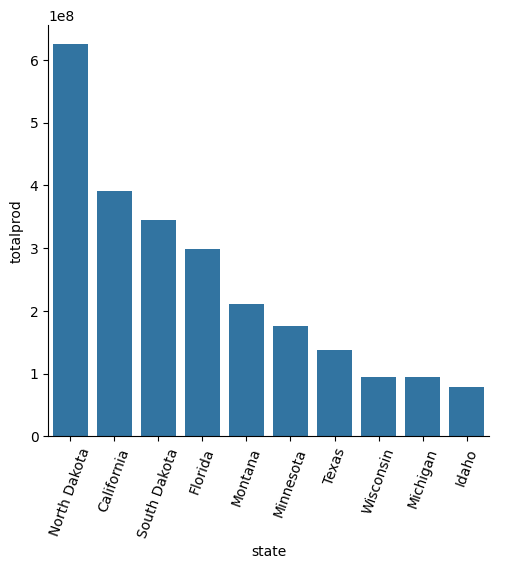

In [25]:
sns.catplot(data=df_top10 , x='state' , y='totalprod' , kind='bar');
plt.xticks(rotation=70);

North Dakota produces max amt of honey

In [26]:
df_costlytop10 = df.groupby('state')['priceperlb'].sum().sort_values(ascending=False).reset_index().head(10)
df_costlytop10

,state,priceperlb
0,Virginia,55.36
1,Illinois,50.47
2,North Carolina,47.56
3,Kentucky,46.51
4,Tennessee,44.64
5,West Virginia,43.61
6,New Jersey,41.25
7,Vermont,40.43
8,Maine,38.42
9,Ohio,38.26


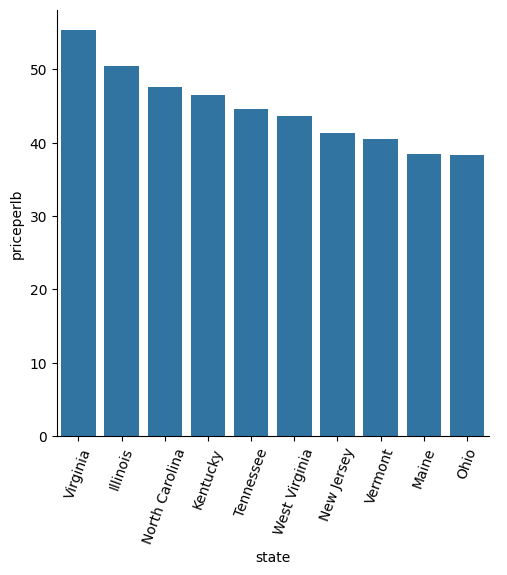

In [27]:
sns.catplot(data=df_costlytop10 , x='state' , y='priceperlb' , kind='bar');
plt.xticks(rotation=70);

In [28]:
bottom10_price= df.groupby('state').sum()[['priceperlb']].sort_values('priceperlb', ascending=False).reset_index().tail(10) #top 10 states producing minimum honey
bottom10_price

,state,priceperlb
34,South Dakota,24.80
35,North Dakota,24.56
36,Nevada,24.41
37,Arkansas,24.35
38,Mississippi,23.88
39,Louisiana,23.77
40,New Mexico,19.77
41,South Carolina,16.57
42,Maryland,9.37
43,Oklahoma,8.74


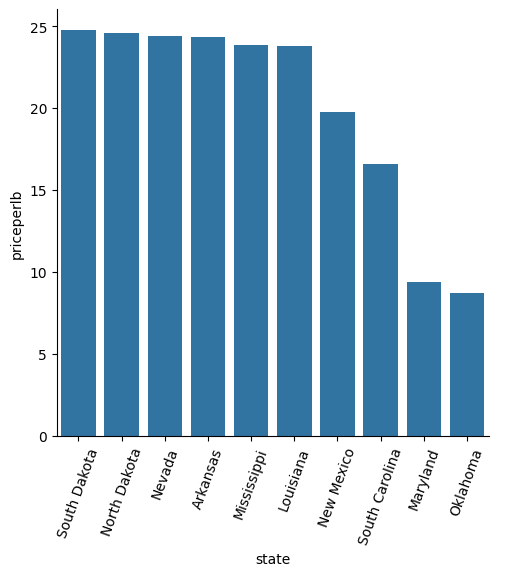

In [29]:
sns.catplot(data=bottom10_price , x='state' , y='priceperlb' , kind='bar');
plt.xticks(rotation=70);

Virginia produces the costliest honey
Oklahoma the cheapest

Let's look at the overall trend of honey production in the US over the years

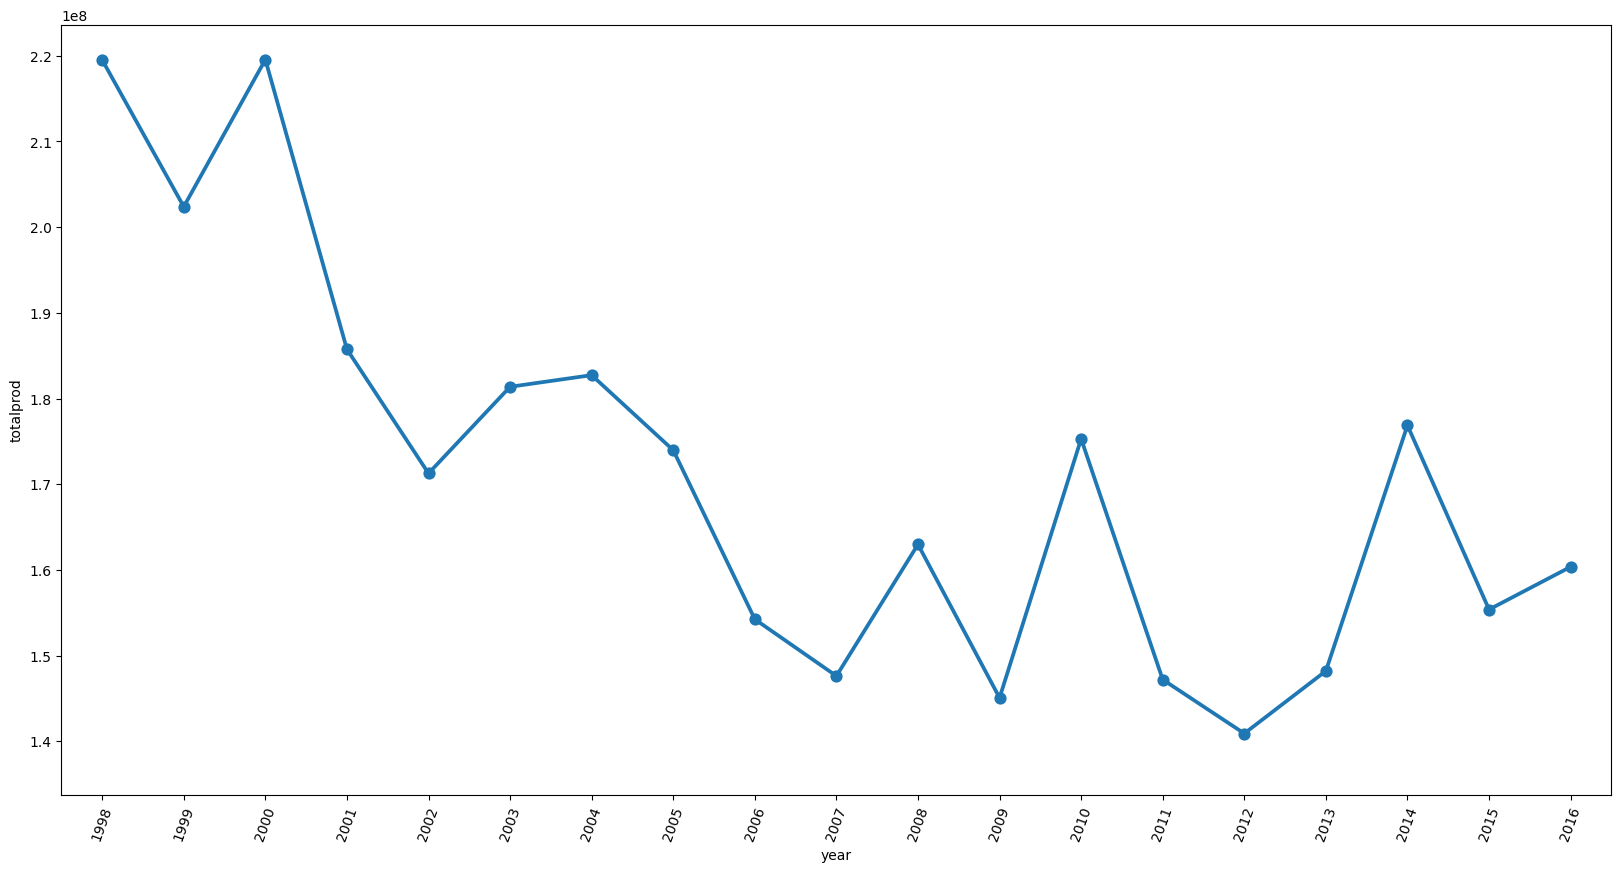

In [30]:
plt.figure(figsize=(20, 10))
sns.pointplot(data=df , x='year' , y='totalprod',estimator=sum,errorbar=('ci', False));
plt.xticks(rotation=70);

Overall honey production in the US is decreasing over the years

Production Trend

<ipython-input-33-319060fcb8a3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='year', y='totalprod', data=df, estimator=sum, ci=None, hue = 'state');


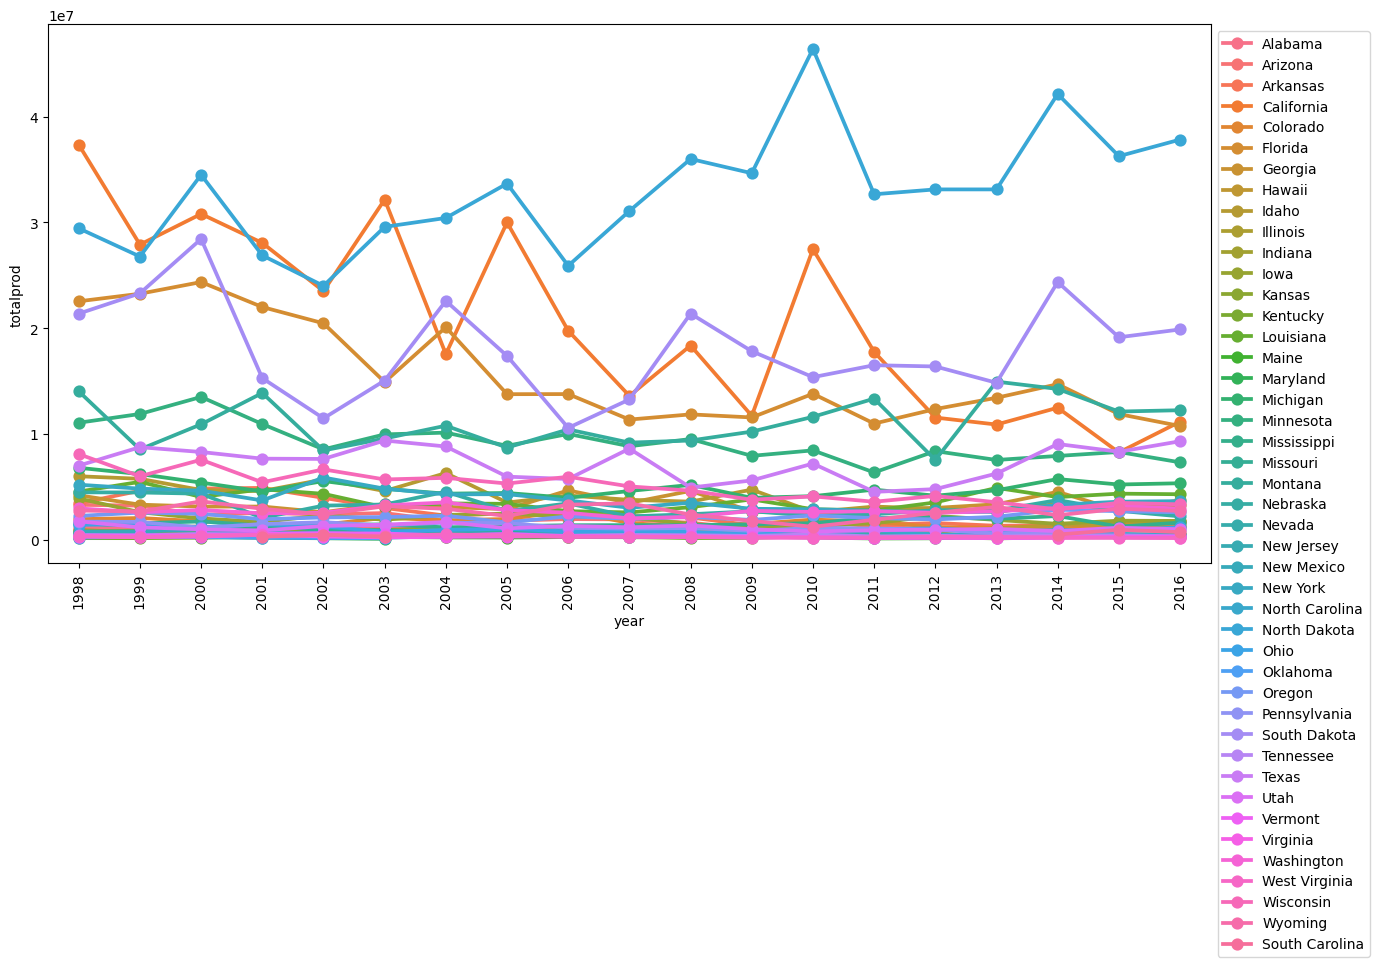

In [33]:
plt.figure(figsize=(15, 7)) # To resize the plot
sns.pointplot(x='year', y='totalprod', data=df, estimator=sum, ci=None, hue = 'state');
plt.legend(bbox_to_anchor=(1, 1));
plt.xticks(rotation=90);

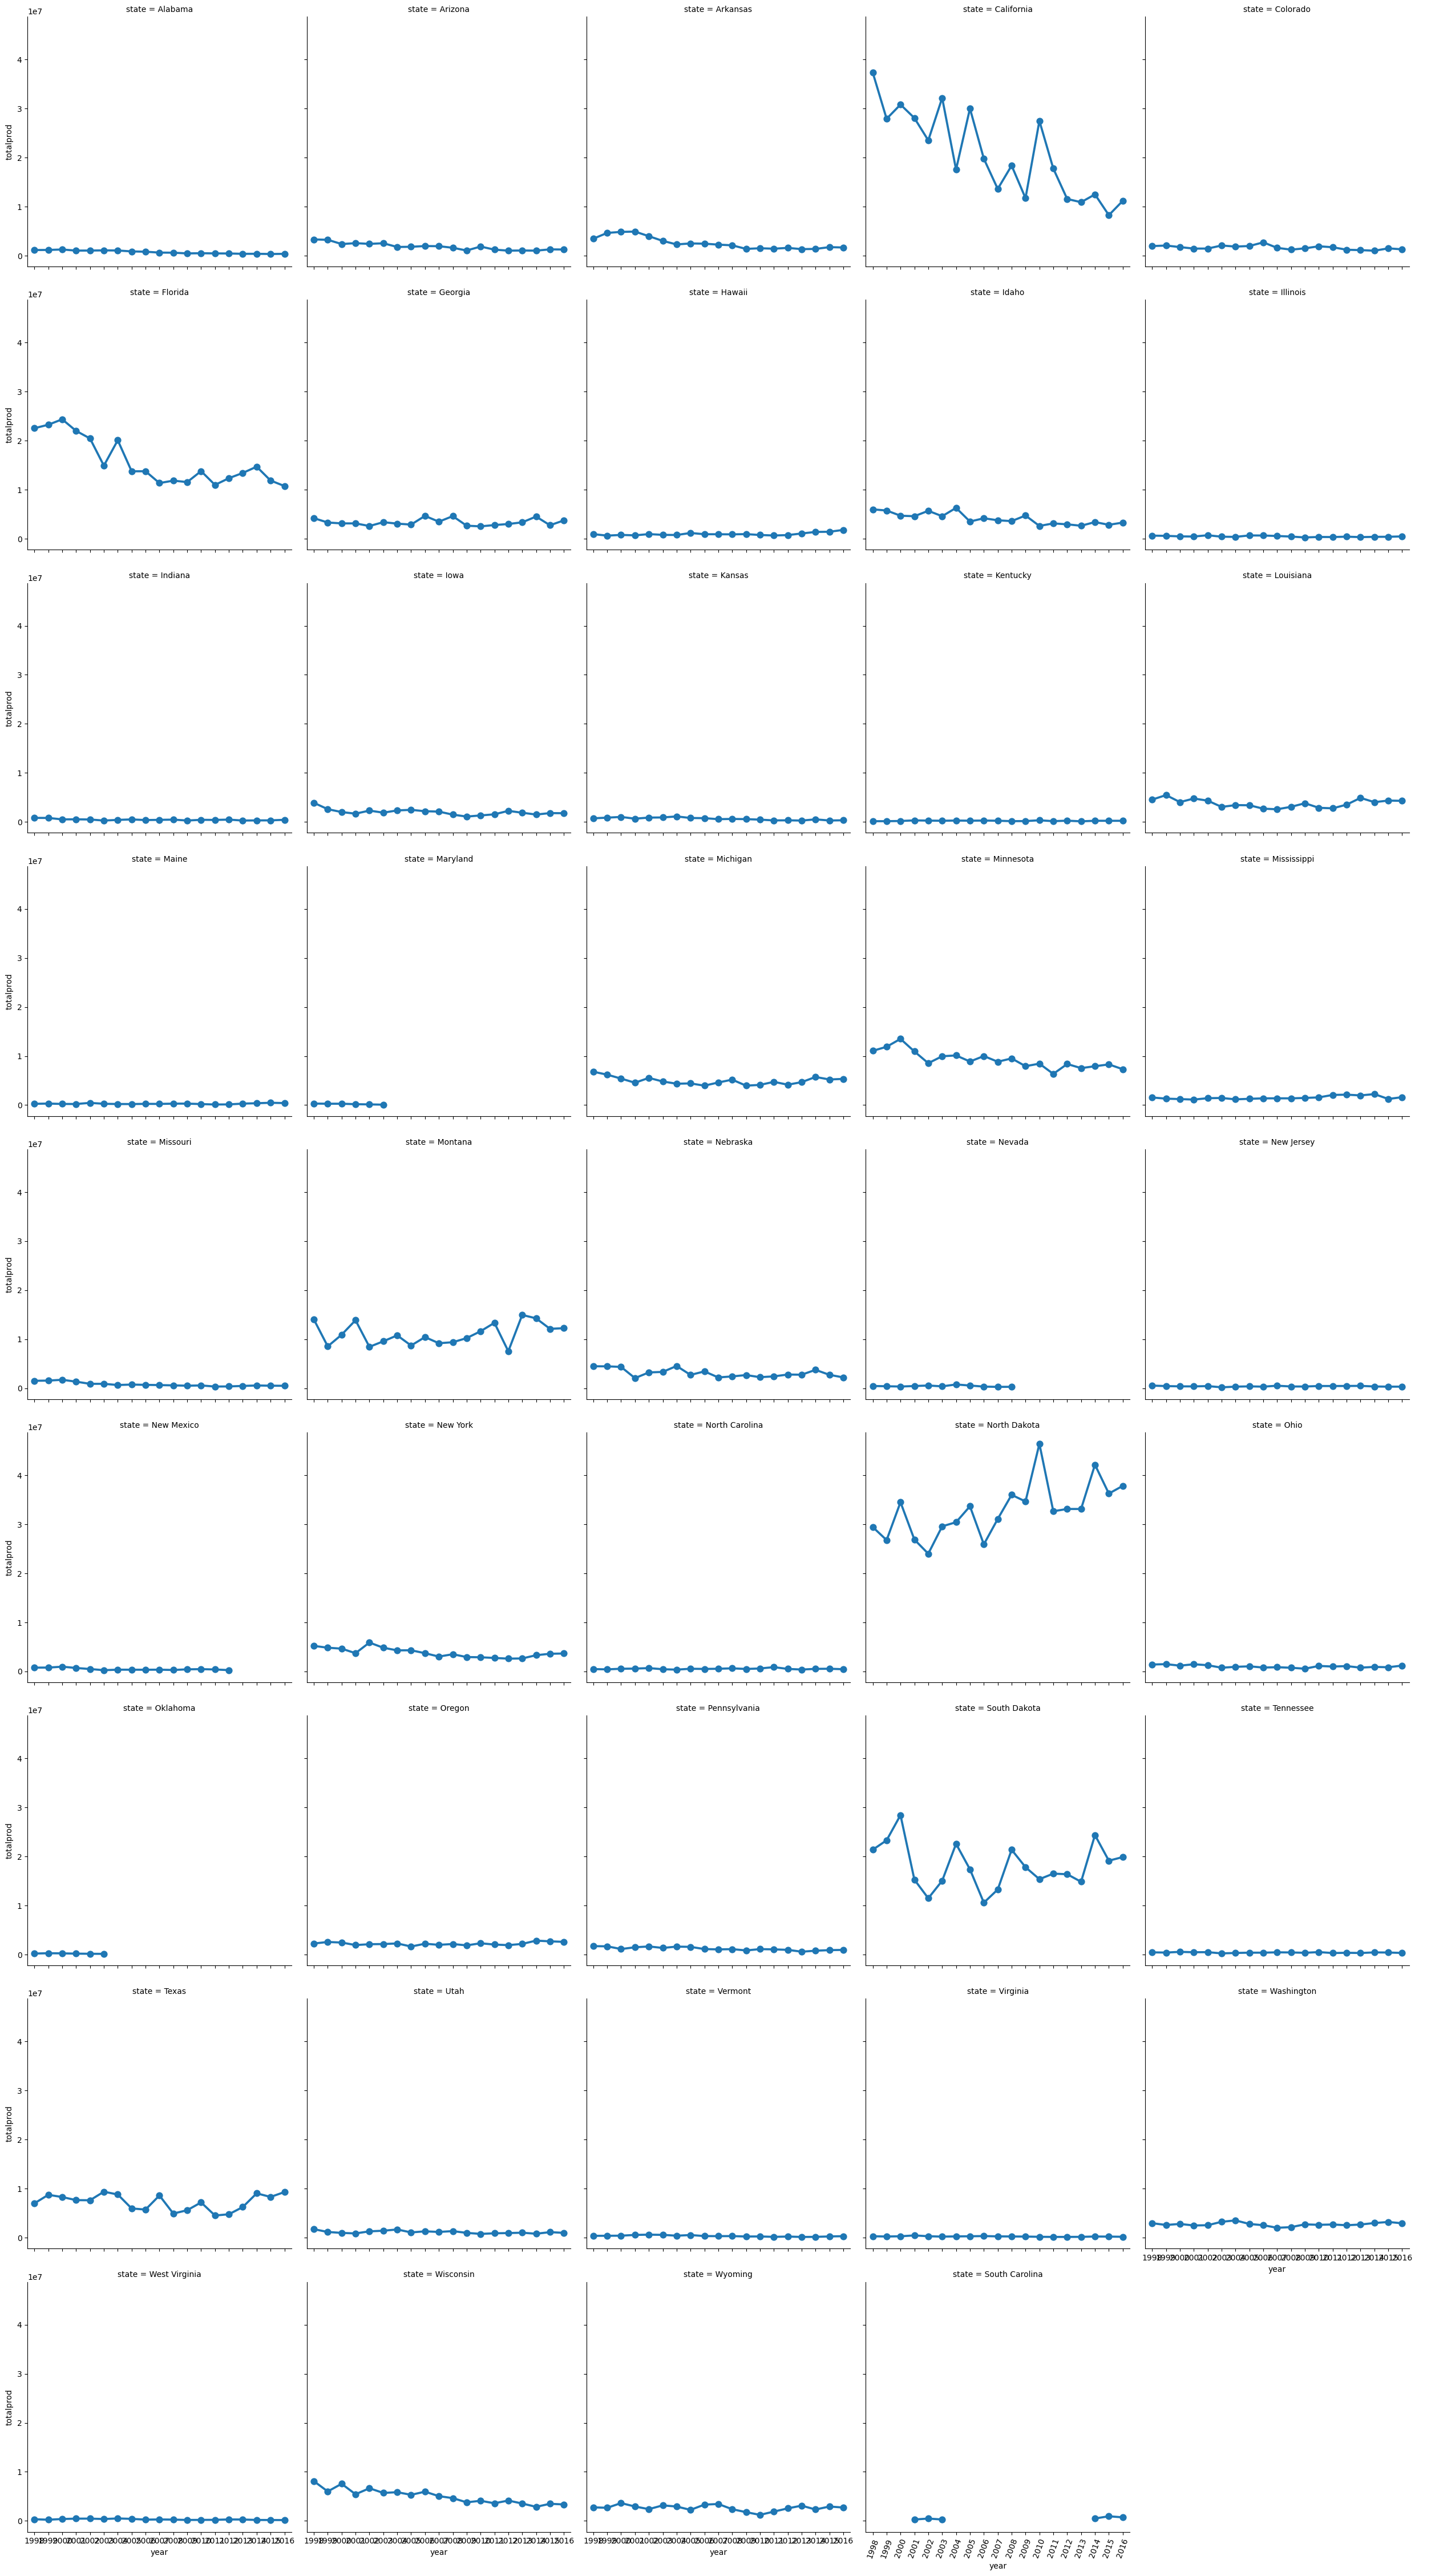

In [35]:
sns.catplot(data=df , x='year' , y='totalprod' , col='state' , estimator = 'sum', kind='point', col_wrap=5);
plt.xticks(rotation=70);

CA,IN are seeing a decline in honey production
SD is seeing an increase
Rest of the states its pretty much the same

Yearly trend in 5 states

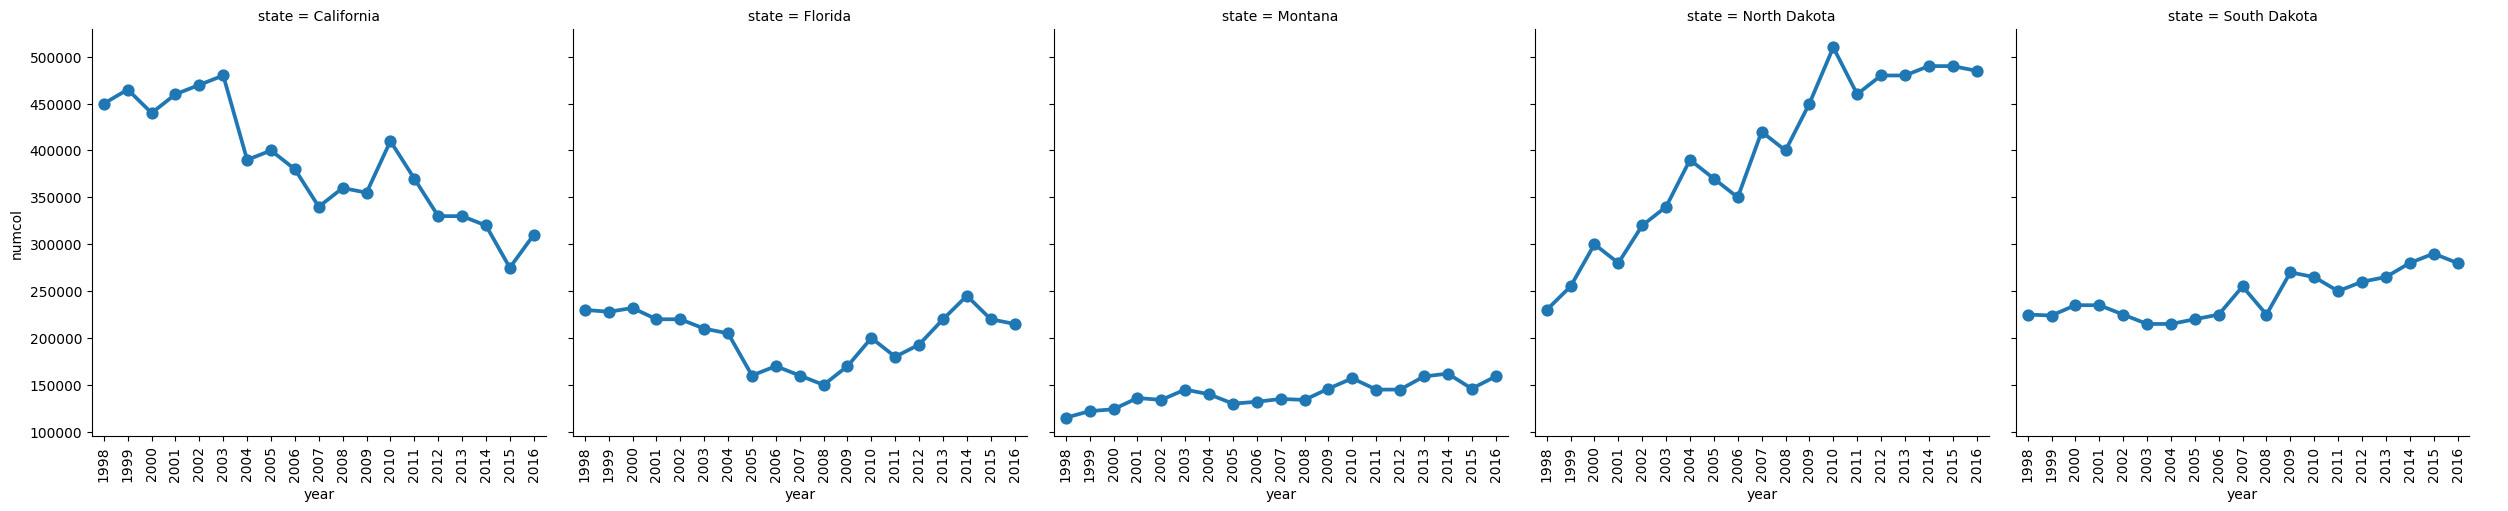

In [39]:
cplot1 = sns.catplot(data=df[df['state'].isin(["North Dakota","California","South Dakota","Florida","Montana"])] , x='year' , y='numcol' , col='state' , estimator = 'sum', kind='point', col_wrap=5);
cplot1.set_xticklabels(rotation=90);

The no of colonies in ND and SD are increasing
FL and Montana the no of colonies are pretty much the same
CA is seeing a decrease

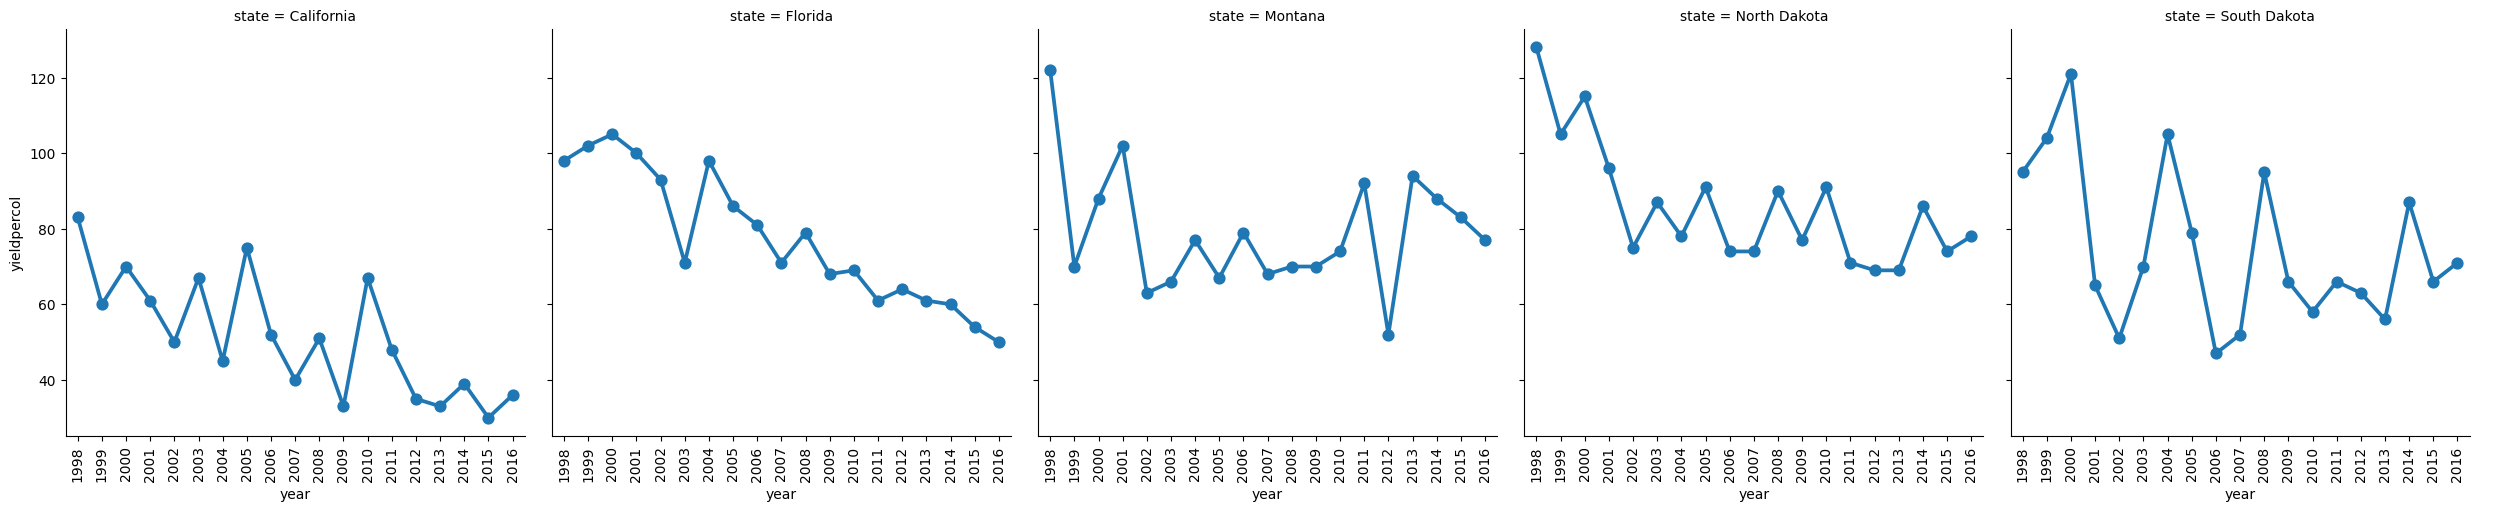

In [40]:
cplot1 = sns.catplot(data=df[df['state'].isin(["North Dakota","California","South Dakota","Florida","Montana"])] , x='year' , y='yieldpercol' , col='state' , estimator = 'sum', kind='point', col_wrap=5);
cplot1.set_xticklabels(rotation=90);

yield is decreasing steadily for all 5 states

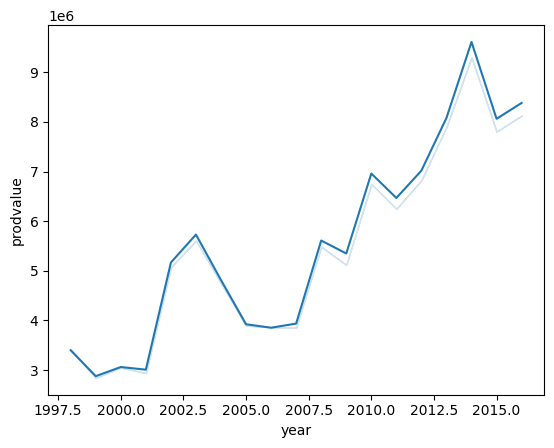

In [45]:
sns.lineplot(data=df , x='year' , y='prodvalue',errorbar=('ci', False));
plt.show()

As the supply decreased the demand has increased

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [Text(0, 0, 'North Dakota'),
  Text(1, 0, 'California'),
  Text(2, 0, 'South Dakota'),
  Text(3, 0, 'Florida'),
  Text(4, 0, 'Montana'),
  Text(5, 0, 'Minnesota'),
  Text(6, 0, 'Texas'),
  Text(7, 0, 'Wisconsin'),
  Text(8, 0, 'Michigan'),
  Text(9, 0, 'Idaho'),
  Text(10, 0, 'New York'),
  Text(11, 0, 'Louisiana'),
  Text(12, 0, 'Arkansas'),
  Text(13, 0, 'Georgia'),
  Text(14, 0, 'Nebraska'),
  Text(15, 0, 'Iowa'),
  Text(16, 0, 'Wyoming'),
  Text(17, 0, 'Washington'),
  Text(18, 0, 'Arizona'),
  Text(19, 0, 'Oregon'),
  Text(20, 0, 'Colorado'),
  Text(21, 0, 'Mississippi'),
  Text(22, 0, 'Hawaii'),
  Text(23, 0, 'Utah'),
  Text(24, 0, 'Missouri'),
  Text(25, 0, 'Pennsylvania'),
  Text(26, 0, 'Ohio'),
  Text(27, 0, 'Alabama'),
  Tex

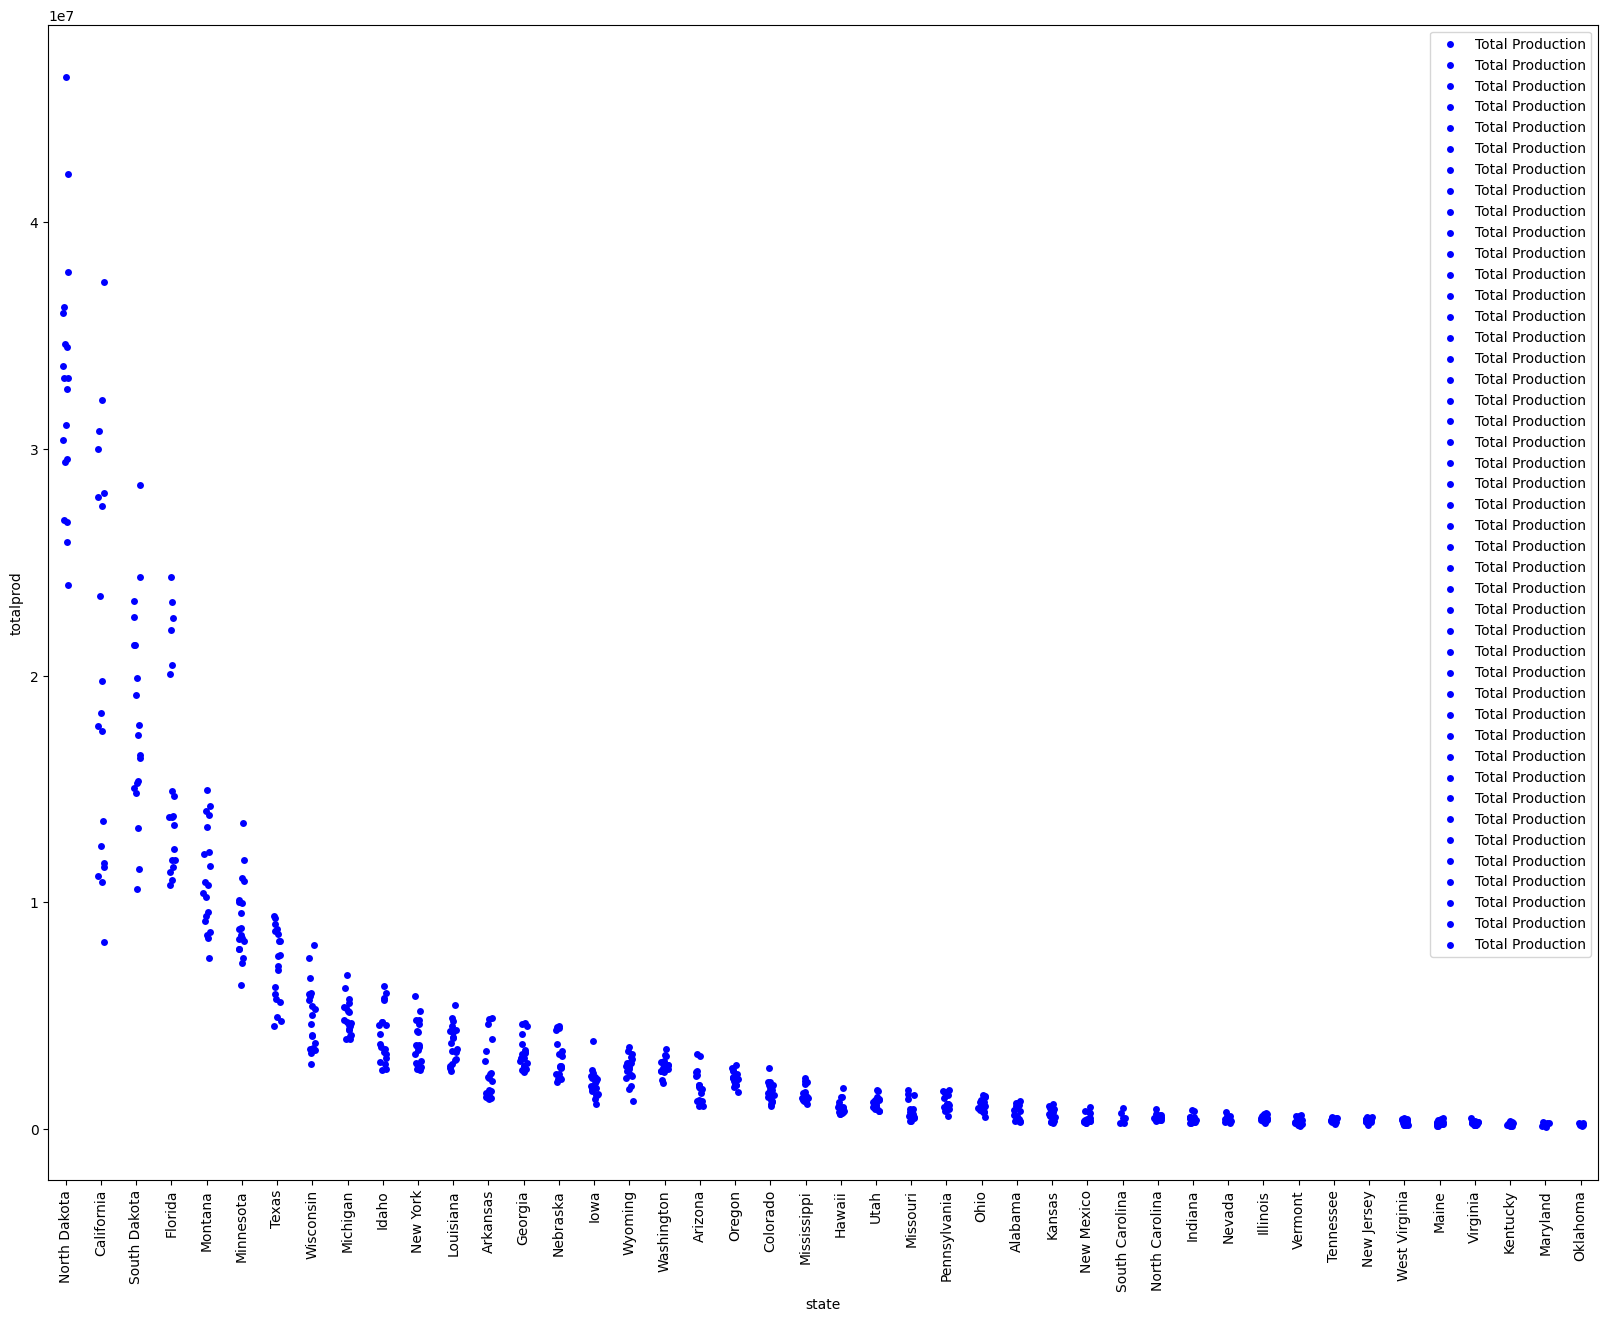

In [46]:
plt.figure(figsize = (20,15)) # To resize the plot

# Plot total production per state
sns.stripplot(x="state", y="totalprod", data=df.sort_values("totalprod", ascending=False),
            label="Total Production", color="b", jitter=True)
plt.xticks(rotation=90)

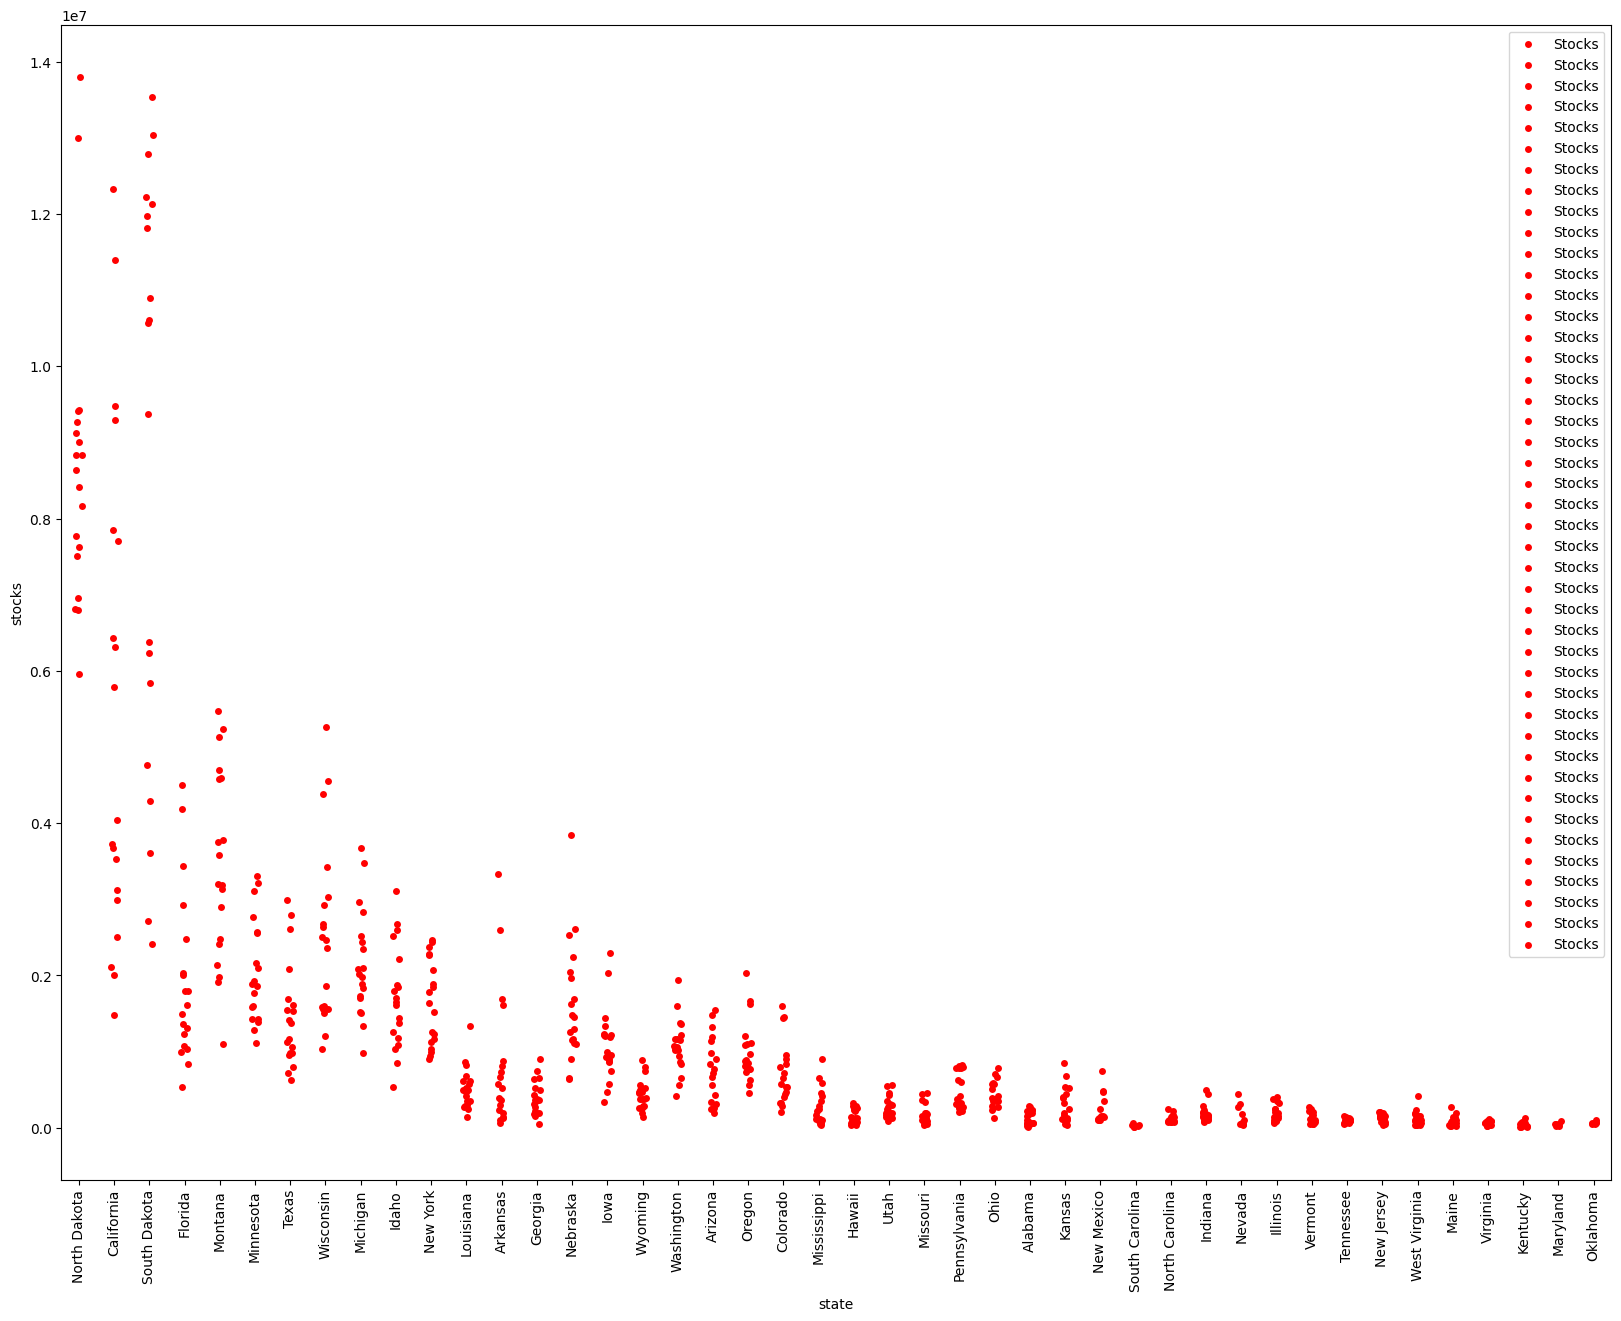

In [47]:
plt.figure(figsize = (20,15)) # To resize the plot
# Plot stocks per state
sns.stripplot(x="state", y="stocks", data=df.sort_values("totalprod", ascending=False),
            label="Stocks", color="r", jitter=True)

plt.xticks(rotation=90);

ND seems to have capitalized on this trend

average price per pound of honey across states

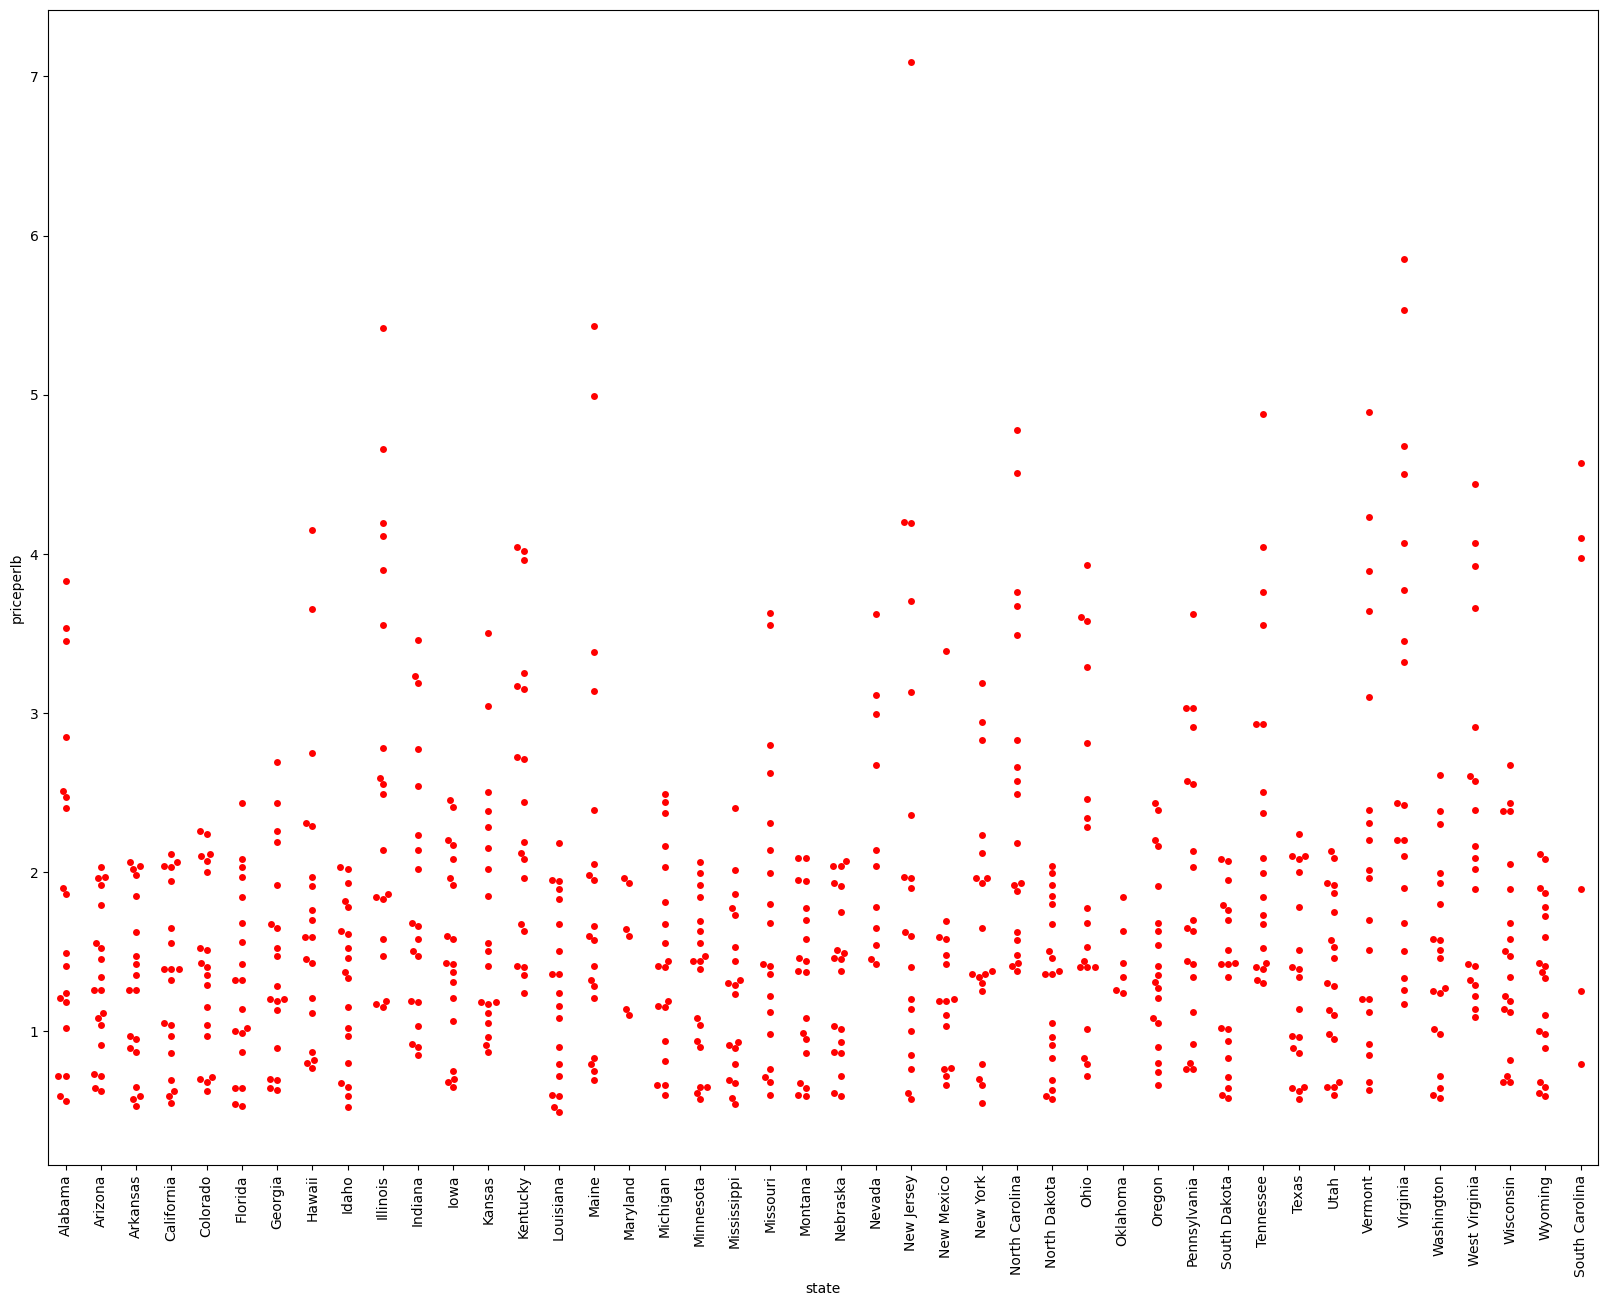

In [53]:
plt.figure(figsize = (20,15)) # To resize the plot
sns.swarmplot(data=df,x="state", y="priceperlb", color="r");

plt.xticks(rotation=90);

Insights

We can conclude that the total honey production has declined over the years whereas the value of production per pound has increased
The reason for the declined honey production is the decrease in the yield per colony over the years
The major honey-producing states are California, Florida, North Dakota, South Dakota and Montana
Among these, Florida has been very efficient in selling honey